<a href="https://colab.research.google.com/github/2303A52393/AIML/blob/main/EX_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("/content/teen_phone_addiction_dataset.csv")

# Discretize Addiction_Level
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
df['Addiction_Level_Category'] = pd.cut(df['Addiction_Level'], bins=bins, labels=labels, include_lowest=True)

# Define target and features
target_column = "Addiction_Level_Category"
X = pd.get_dummies(df.drop(columns=[target_column, 'Addiction_Level']), drop_first=True) # Drop the original continuous column as well
y = df[target_column]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        High       0.86      1.00      0.92       511
         Low       1.00      0.10      0.18        10
      Medium       0.25      0.01      0.02        79

    accuracy                           0.85       600
   macro avg       0.70      0.37      0.38       600
weighted avg       0.78      0.85      0.79       600



K-Nearest Neighbors (KNN)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("/content/teen_phone_addiction_dataset.csv")

# Discretize Addiction_Level
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
df['Addiction_Level_Category'] = pd.cut(df['Addiction_Level'], bins=bins, labels=labels, include_lowest=True)


# Define target and features
target_column = "Addiction_Level_Category"
X = pd.get_dummies(df.drop(columns=[target_column, 'Addiction_Level']), drop_first=True)
y = df[target_column]


# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)

# Encode labels for classification report
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)


print("KNN Classification Report:\n", classification_report(y_test_encoded, y_pred_encoded, target_names=labels))

KNN Classification Report:
               precision    recall  f1-score   support

         Low       0.85      1.00      0.92       511
      Medium       0.00      0.00      0.00        10
        High       1.00      0.01      0.03        79

    accuracy                           0.85       600
   macro avg       0.62      0.34      0.32       600
weighted avg       0.86      0.85      0.79       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine (SVM)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("/content/teen_phone_addiction_dataset.csv")

# Optional: Discretize Addiction_Level if needed
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
df['Addiction_Level_Category'] = pd.cut(df['Addiction_Level'], bins=bins, labels=labels, include_lowest=True)

# Define target and features
target_column = "Addiction_Level_Category"
X = pd.get_dummies(df.drop(columns=[target_column, 'Addiction_Level']), drop_first=True)
y = df[target_column]

# Encode target if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test_scaled)
print("SVM Classification Report:\n", classification_report(y_test, y_pred))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       511
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        79

    accuracy                           0.85       600
   macro avg       0.28      0.33      0.31       600
weighted avg       0.73      0.85      0.78       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("teen_phone_addiction_dataset.csv")

# Optional: Discretize Addiction_Level if needed
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
df['Addiction_Level_Category'] = pd.cut(df['Addiction_Level'], bins=bins, labels=labels, include_lowest=True)

# Define target and features
target_column = "Addiction_Level_Category"  # or "is_addicted"
X = pd.get_dummies(df.drop(columns=[target_column, 'Addiction_Level']), drop_first=True)
y = df[target_column]

# Encode target if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test_scaled)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       511
           1       0.50      0.10      0.17        10
           2       0.53      0.51      0.52        79

    accuracy                           0.88       600
   macro avg       0.65      0.52      0.54       600
weighted avg       0.87      0.88      0.87       600



Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("teen_phone_addiction_dataset.csv")

# Optional: Discretize Addiction_Level if needed
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
df['Addiction_Level_Category'] = pd.cut(df['Addiction_Level'], bins=bins, labels=labels, include_lowest=True)

# Define target and features
target_column = "Addiction_Level_Category"
X = pd.get_dummies(df.drop(columns=[target_column, 'Addiction_Level']), drop_first=True)
y = df[target_column]

# Encode target if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       511
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        79

    accuracy                           0.85       600
   macro avg       0.28      0.33      0.31       600
weighted avg       0.73      0.85      0.78       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naïve Bayes (Gaussian, Multinomial, Bernoulli)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, Binarizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("teen_phone_addiction_dataset.csv")

# Optional: Discretize Addiction_Level
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
df['Addiction_Level_Category'] = pd.cut(df['Addiction_Level'], bins=bins, labels=labels, include_lowest=True)

# Define target and features
target_column = "Addiction_Level_Category"
X = pd.get_dummies(df.drop(columns=[target_column, 'Addiction_Level']), drop_first=True)
y = df[target_column]

# Encode target
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1️⃣ GaussianNB (for continuous features)
scaler = StandardScaler()
X_train_g = scaler.fit_transform(X_train)
X_test_g = scaler.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train_g, y_train)
y_pred_g = gnb.predict(X_test_g)
print("GaussianNB Report:\n", classification_report(y_test, y_pred_g))

# 2️⃣ MultinomialNB (for count data)
X_train_m = X_train.copy()
X_test_m = X_test.copy()

mnb = MultinomialNB()
mnb.fit(X_train_m, y_train)
y_pred_m = mnb.predict(X_test_m)
print("MultinomialNB Report:\n", classification_report(y_test, y_pred_m))

# 3️⃣ BernoulliNB (for binary features)
binarizer = Binarizer()
X_train_b = binarizer.fit_transform(X_train)
X_test_b = binarizer.transform(X_test)

bnb = BernoulliNB()
bnb.fit(X_train_b, y_train)
y_pred_b = bnb.predict(X_test_b)
print("BernoulliNB Report:\n", classification_report(y_test, y_pred_b))

GaussianNB Report:
               precision    recall  f1-score   support

           0       0.81      0.14      0.25       511
           1       0.01      0.50      0.02        10
           2       0.09      0.01      0.02        79

    accuracy                           0.13       600
   macro avg       0.30      0.22      0.10       600
weighted avg       0.70      0.13      0.21       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MultinomialNB Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       511
           1       0.00      0.00      0.00        10
           2       0.24      0.16      0.20        79

    accuracy                           0.81       600
   macro avg       0.37      0.36      0.36       600
weighted avg       0.77      0.81      0.79       600

BernoulliNB Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       511
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        79

    accuracy                           0.85       600
   macro avg       0.28      0.33      0.31       600
weighted avg       0.73      0.85      0.78       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
preds = rf.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.2f}")

# Save predictions to CSV
df = pd.DataFrame({
    "Sample_Index": range(len(preds)),
    "Predicted_Label": preds,
    "True_Label": y_test,
    "Correct": preds == y_test
})
df.to_csv("random_forest_predictions.csv", index=False)

print("CSV file 'random_forest_predictions.csv' created.")

Accuracy: 1.00
CSV file 'random_forest_predictions.csv' created.


XGBoost (Extreme Gradient Boosting)


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

# Predict on test set
preds = xgb.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.2f}")

# Save predictions to CSV
df = pd.DataFrame({
    "Sample_Index": range(len(preds)),
    "Predicted_Label": preds,
    "True_Label": y_test,
    "Correct": preds == y_test
})
df.to_csv("xgboost_predictions.csv", index=False)

print("CSV file 'xgboost_predictions.csv' created.")

Accuracy: 1.00
CSV file 'xgboost_predictions.csv' created.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:56:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Perceptron

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._sign
        self.weights = None
        self.bias = None

    def _sign(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

# 🧪 Example usage
if __name__ == "__main__":
    # Sample dataset: OR logic gate
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([-1, 1, 1, 1])  # OR gate output mapped to -1 and 1

    clf = Perceptron(learning_rate=0.1, n_iters=10)
    clf.fit(X, y)
    predictions = clf.predict(X)

    print("Predictions:", predictions)

Predictions: [-1  1  1  1]


Simple RNN


In [ ]:
import torch
import torch.nn as nn

# Define the RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)  # out: [batch_size, seq_length, hidden_size]
        out = out[:, -1, :]   # Take the last time step's output
        out = self.fc(out)
        return out

# 🧪 Example usage
if __name__ == "__main__":
    # Parameters
    input_size = 10     # Number of features per time step
    hidden_size = 20    # Number of hidden units
    output_size = 1     # Regression or binary classification
    seq_length = 5      # Number of time steps
    batch_size = 3

    # Dummy input: [batch_size, seq_length, input_size]
    x = torch.randn(batch_size, seq_length, input_size)

    model = SimpleRNN(input_size, hidden_size, output_size)
    output = model(x)

    print("Output shape:", output.shape)
    print("Output:", output)

Output shape: torch.Size([3, 1])
Output: tensor([[-0.0095],
        [ 0.0638],
        [ 0.1098]], grad_fn=<AddmmBackward0>)


Long Short-Term Memory (LSTM)


In [ ]:
import torch
import torch.nn as nn

# Define the LSTM model
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)         # out: [batch_size, seq_length, hidden_size]
        out = out[:, -1, :]           # Take the last time step's output
        out = self.fc(out)            # Final output
        return out

# 🧪 Example usage
if __name__ == "__main__":
    # Parameters
    input_size = 10     # Features per time step
    hidden_size = 20    # Hidden units
    output_size = 1     # Regression or binary classification
    seq_length = 5      # Time steps
    batch_size = 3

    # Dummy input: [batch_size, seq_length, input_size]
    x = torch.randn(batch_size, seq_length, input_size)

    model = SimpleLSTM(input_size, hidden_size, output_size)
    output = model(x)

    print("Output shape:", output.shape)
    print("Output:", output)

Output shape: torch.Size([3, 1])
Output: tensor([[0.0783],
        [0.1185],
        [0.1364]], grad_fn=<AddmmBackward0>)


SHAP

In [ ]:
pip install shap

Dataset Shape: (3000, 25)
Columns: ['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']
   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  

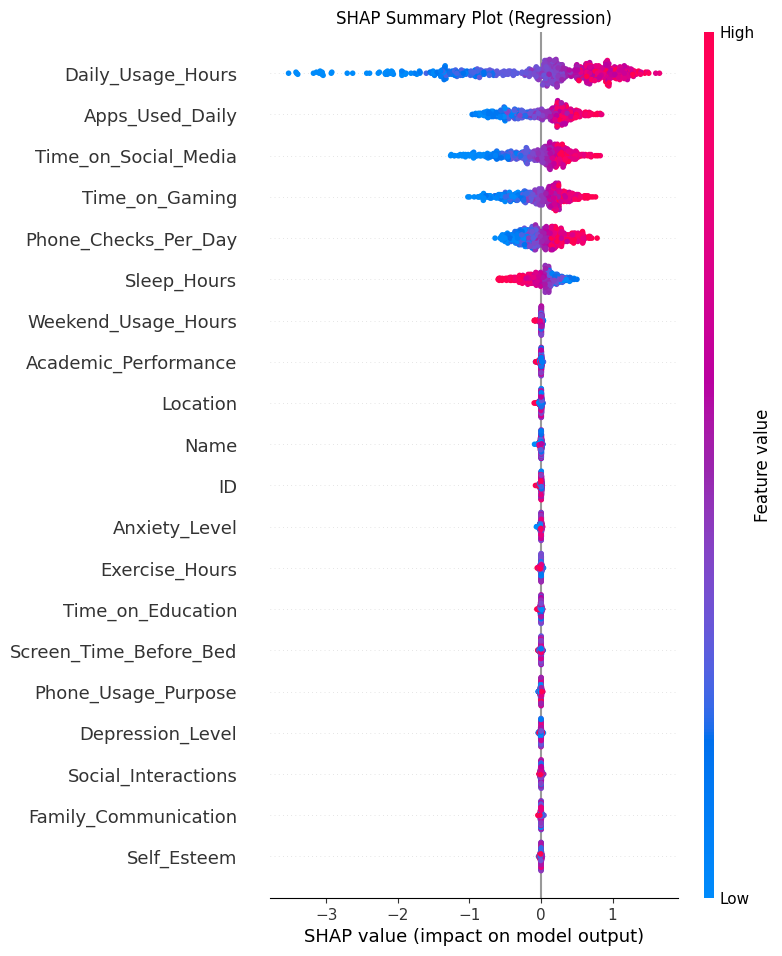

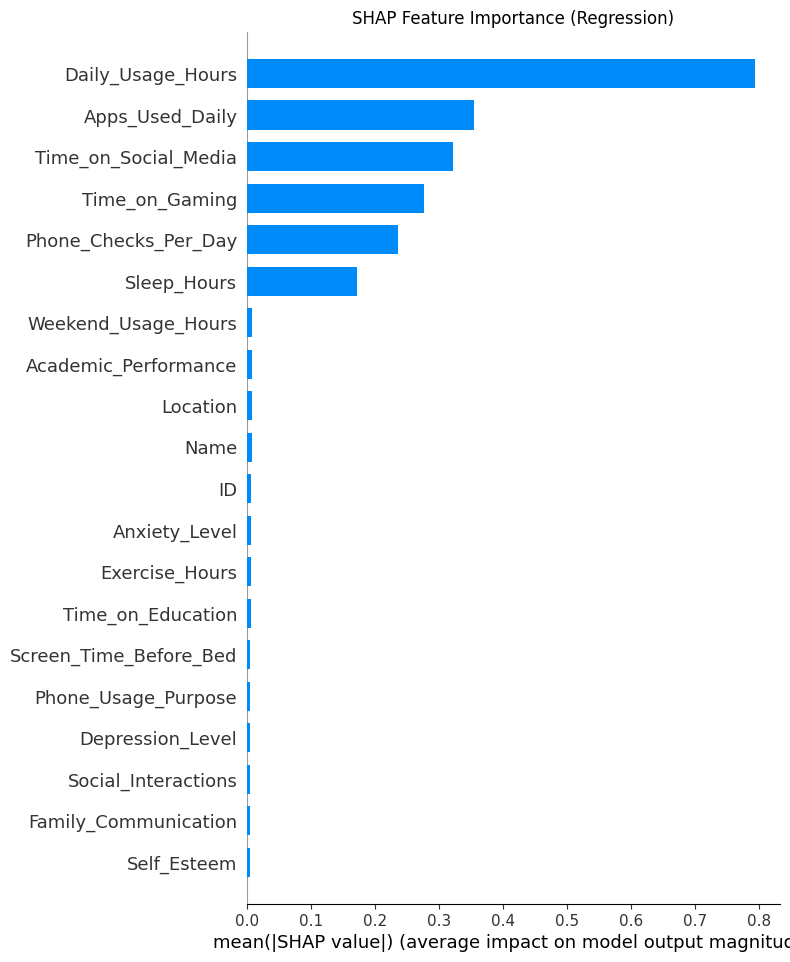

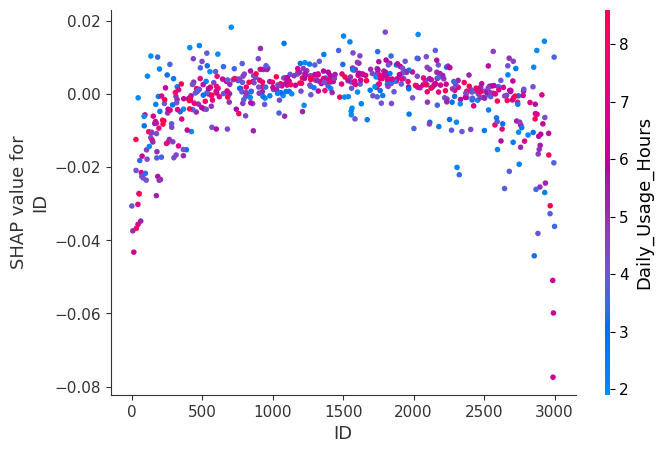

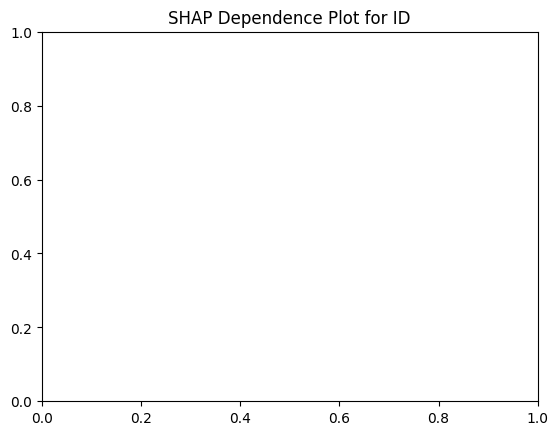

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# 1. Load dataset
df = pd.read_csv("teen_phone_addiction_dataset.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# 2. Set your target column (change this if needed)
target_column = 'Addiction_Level'  # <-- change to your actual numeric target column

# 3. Encode categorical variables (if any)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# 4. Split into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Explain model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 8. SHAP Summary Plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot (Regression)")
plt.show()

# 9. SHAP Feature Importance
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Regression)")
plt.show()

# 10. Dependence plot for one feature
feature_name = X_test.columns[0]  # pick a feature you want to analyze
shap.dependence_plot(feature_name, shap_values, X_test)
plt.title(f"SHAP Dependence Plot for {feature_name}")
plt.show()

ICE

Dataset Shape: (3000, 25)
Columns: ['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']


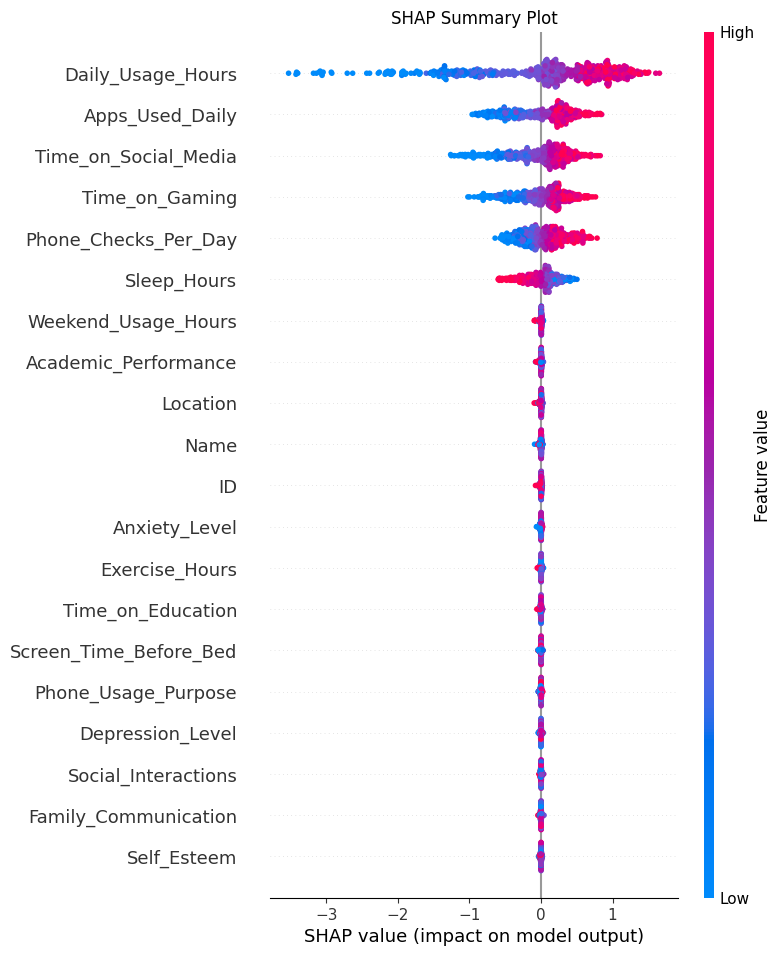

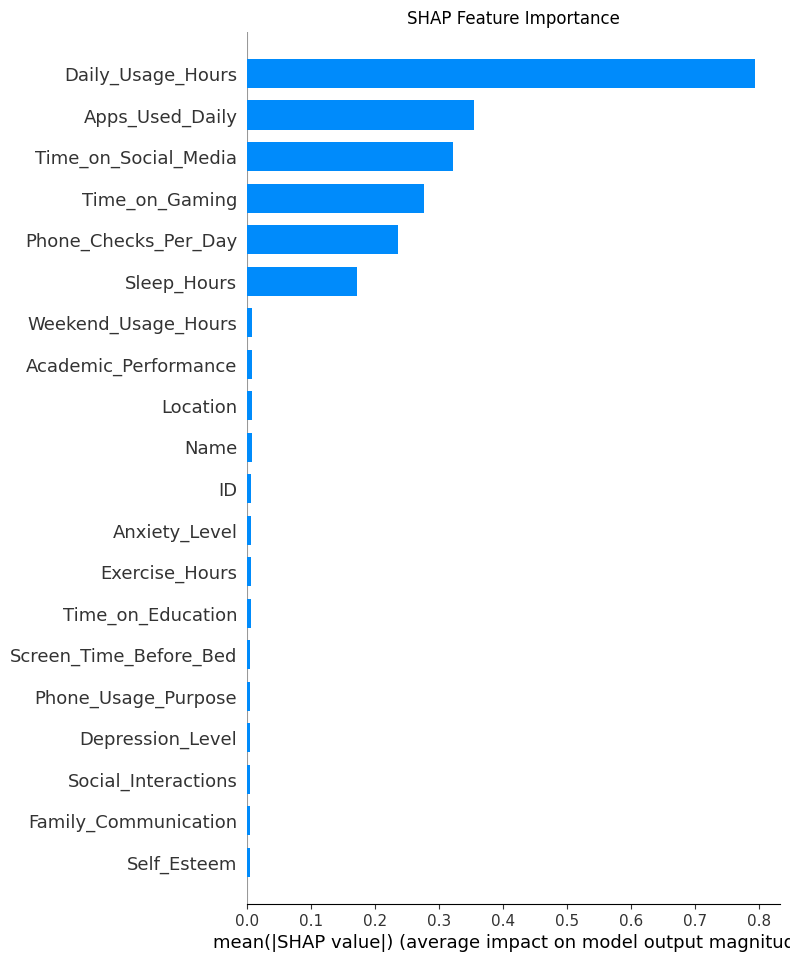

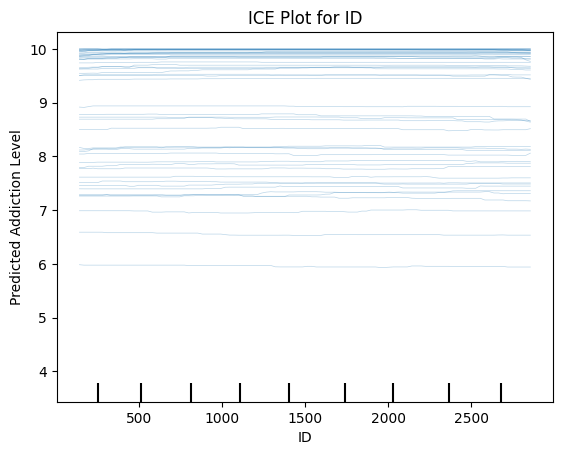

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay

# 1. Load dataset
df = pd.read_csv("teen_phone_addiction_dataset.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

# 2. Set your target column name
target_column = 'Addiction_Level'

# 3. Encode categorical variables (if any)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# 4. Split into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP EXPLANATION
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot")
plt.show()

# SHAP Feature Importance
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.show()
# ICE (Individual Conditional Expectation)
if len(X_test.columns) > 0:
    feature_name = X_test.columns[0]

    # ICE Plot using sklearn's PartialDependenceDisplay
    PartialDependenceDisplay.from_estimator(
        model,
        X_test,
        features=[feature_name],
        kind="individual",  # ICE curves
        subsample=min(50, X_test.shape[0]),
    )

    plt.title(f"ICE Plot for {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Predicted Addiction Level")
    plt.show()
else:
    print("Warning: No features remaining after processing. Cannot generate ICE plot.")

LIME

In [ ]:
pip install lime


Dataset Shape: (3000, 25)
Columns: ['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']
   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



LIME Explanation:
[('Daily_Usage_Hours <= 3.70', -2.1198922051492084), ('Time_on_Gaming <= 0.80', -0.6049265564173826), ('13.00 < Apps_Used_Daily <= 17.00', 0.4499762734714373), ('Phone_Checks_Per_Day > 115.00', 0.4033303366092927), ('5.50 < Sleep_Hours <= 6.50', 0.1577139966475909), ('75.00 < Academic_Performance <= 87.00', 0.0453913129556384), ('1465.50 < Name <= 2199.25', 0.044004240495867986), ('674.50 < Location <= 1363.50', 0.034440795467409704), ('Time_on_Education > 1.50', 0.034212145478143836), ('Anxiety_Level <= 3.00', -0.03387483292560428)]


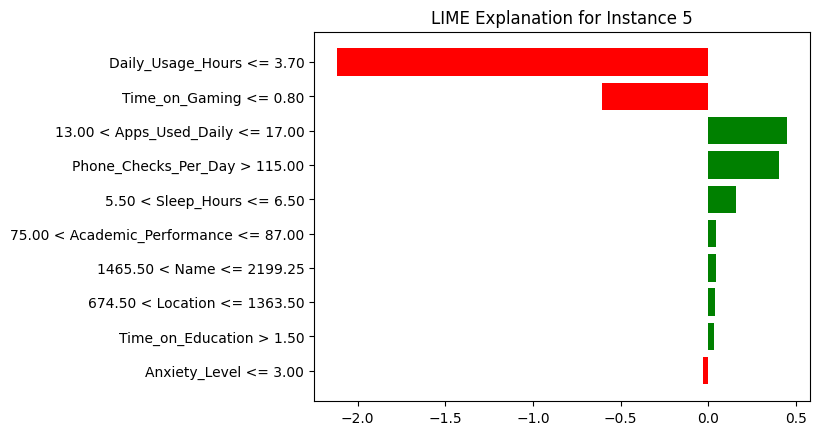

In [ ]:
# ==============================
# LIME EXPLANATION (Regression)
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular
import numpy as np # Import numpy

# 1. Load dataset
df = pd.read_csv("teen_phone_addiction_dataset.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# 2. Set your target column name
target_column = 'Addiction_Level'  # <-- change this to your actual numeric target

# 3. Encode categorical variables (if any)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# 4. Split into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ==============================
# LIME EXPLANATION
# ==============================

# Create LIME explainer for regression
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

# Pick a test sample to explain
i = 5  # you can change this index
sample = X_test.iloc[i].values.reshape(1, -1)
print("\nExplaining instance:", i)
print("Actual value:", y_test.iloc[i])
print("Predicted value:", model.predict(sample)[0])

# Define a prediction function that takes a numpy array and returns predictions
def predict_fn_for_lime(data):
    # Convert the numpy array back to a pandas DataFrame with the original feature names
    data_df = pd.DataFrame(data, columns=X_train.columns)
    return model.predict(data_df)


# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=predict_fn_for_lime, # Use the wrapper function
    num_features=10
)

# Show explanation in text
print("\nLIME Explanation:")
print(exp.as_list())

# 7. Visualize LIME Explanation
exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {i}")
plt.show()